# Logistic Regression

This notebook explains how Logistic is used to classify wether a student is admitted or not admitted based on marks in two exams.

The Data contains two feature columns and one target column:
1. Marks in exam 1
2. Marks in exam 2
3. Target :
    - 1 : if Admitted
    - 0 : if Not Admitted

In [1]:
#%% Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(10)

In [2]:
# Import Data as a data frame using pandas
col_names = ['Exam1', 'Exam2', 'Admitted']
df = pd.read_csv('marks.csv', header = None, names = col_names)

In [3]:
# Seperate input features and targets
x = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

#### Data Analysis

Let us observe the data first

In [4]:
# First let us see how many students have been admitted and how many have not been.
num_admitted = df.loc[y == 1].iloc[:, 1].count()
num_notadmitted = df.loc[y == 0].iloc[:, 1].count()
print('Number of students admitted : {:d}'.format(num_admitted))
print('Number of students not admitted : {:d}'.format(num_notadmitted))

Number of students admitted : 60
Number of students not admitted : 40


We can also use histogram to directly plot what we did above, by using the plot functions of pandas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D8D924048>]],
      dtype=object)

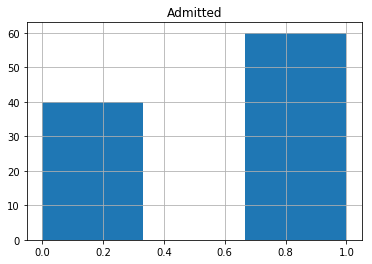

In [5]:
df.hist('Admitted', bins = 3)

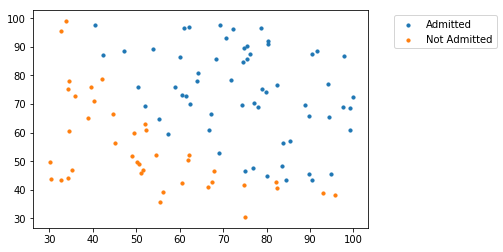

In [6]:
# Plotting the data values
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df.loc[y==1].iloc[:,0], df.loc[y==1].iloc[:, 1], s = 10, label = 'Admitted')
ax.scatter(df.loc[y==0].iloc[:,0], df.loc[y==0].iloc[:, 1], s = 10, label = 'Not Admitted')
ax.legend(bbox_to_anchor = (1.4, 1))

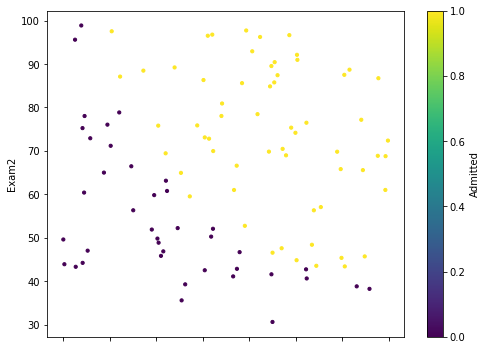

In [7]:
# The above plot can also be obtained using the scatter method on Dataframe

df.plot.scatter(x = 'Exam1',y = 'Exam2', c = 'Admitted',colormap='viridis', s = 10, figsize = (8,6))

#### As we can see that the data is not linearly seperable, we need to use a nonlinear seperation plane which seperates the two classes in data. Hence we use Logistic Regression to classify whether a student is admitted or not admitted. 

#### Before we move on to make the model and start training, we seperate the data into training and validation data

In [8]:
# To randomize the arrays we generate an array containing elements 0,1...,size of data and then shuffle it.
idx = np.arange(x.shape[0])
np.random.shuffle(idx)

# Here we use 80% of data as training and 20% as validation
train_idx = idx[:80]
valid_idx = idx[80:]

In [9]:
# We seperate training and validation data using the index generated above
x_train, y_train = x[train_idx], y[train_idx]
x_valid, y_valid = x[valid_idx], y[valid_idx]

# Reshaped as the model requires it
y_train = y_train.reshape(y_train.shape[0],-1)
y_valid = y_valid.reshape(y_valid.shape[0],-1)

#### We transform the data using Standard Scaler from sklearn. Since sigmoid function is used in the Logistic regression model, and if the values fed to the model are high the output saturates and the model fails to learn

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on training data and transform it
x_train = scaler.fit_transform(x_train)

# Transorm validation/test data
x_valid = scaler.transform(x_valid)

#### A Logistic Regression class is defined as shown below. Gradient descent approach is used here to optimize the model. 


In [11]:
class LogisticRegressionwithGD():
    r"""
    Linear Regression class
    """  
    @staticmethod
    def sigmoid(x):
        return (1/(1+np.exp(-x)))
    
    def __init__(self, input_shape, lr = 0.1, intercept = True):
        
        self.input_shape = input_shape
        self.coeff = np.random.randn(input_shape,1)
        self.lr = lr
        
        if intercept == True:
            self.intercept = 1.0
        else:
            self.intercept = 0
        
        self.train = True
        
    def predict(self, data):
        r""" 
        Predicts output given input data
        """
        self.out = self.sigmoid(np.dot(data,self.coeff) + self.intercept)
        
        # Only in training mode the gradients are retained
        if self.train == True:
            self.dcoeff = data
            self.dint = 1.0
        
        return self.out
    
    def loss_fun(self, pred, true):
        r"""
        Calculates loss and also calculates gradients of coeff, intercept
        """
        loss = -(true * np.log(pred) + (1 - true) * np.log(1 - pred)).mean()
        
        if self.train == True:
            # Gradients calculated only during training
            self.dcoeff =  (1/pred.shape[0]) * (np.dot(self.dcoeff.T, (pred - true)))
            self.dint = (1/pred.shape[0]) * ( np.sum(pred - true))
        
        return loss
    
    def set_mode(self, mode):
        if mode == 'train':
            self.train = True
        elif mode == 'eval':
            self.train = False
        
    def update(self):
        r"""
        Updates parameters and makes gradients zero after update
        """
        self.coeff -= self.lr * self.dcoeff
        self.intercept -= self.lr * self.dint
        
        self.dcoeff = 0
        self.dint = 0

In [12]:
# Initiate the model
model = LogisticRegressionwithGD(x_train.shape[1], lr = 0.1)

In [13]:
print('Before Training ')
print('Coeff : ', model.coeff )
print('Intercept : ', model.intercept)

Before Training 
Coeff :  [[-1.79857302]
 [-0.68520734]]
Intercept :  1.0


In [14]:
# Training
losses = np.array([])

model.set_mode('train')

for i in range(10000):
    y_pred = model.predict(x_train)
    loss = model.loss_fun(y_pred, y_train)
    losses = np.append(losses, loss)
    model.update()
    
    if i % 1000 == 0:
        print('Epoch : {:d}, Loss : {:.4f}'.format(i,loss))

print('Training Completed')

Epoch : 0, Loss : 1.6614
Epoch : 1000, Loss : 0.2006
Epoch : 2000, Loss : 0.1934
Epoch : 3000, Loss : 0.1918
Epoch : 4000, Loss : 0.1913
Epoch : 5000, Loss : 0.1911
Epoch : 6000, Loss : 0.1910
Epoch : 7000, Loss : 0.1910
Epoch : 8000, Loss : 0.1910
Epoch : 9000, Loss : 0.1910
Training Completed


In [15]:
print('After Training ')
print('Coeff : ', model.coeff)
print('Intercept : ', model.intercept)

After Training 
Coeff :  [[4.08009036]
 [4.09645602]]
Intercept :  2.044196762934184


#### Testing the model on validation data

In [16]:
model.set_mode('eval')

y_pred = model.predict(x_valid)
valid_loss = model.loss_fun(y_pred, y_valid)

print('\nValidation Loss',valid_loss)


Validation Loss 0.2815240186039319


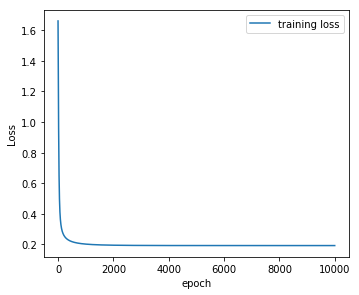

In [17]:
# Plottting Loss across epochs 
fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(221)
ax.plot(range(losses.size),losses, label = 'training loss')
ax.set_xlabel('epoch')
ax.set_ylabel('Loss')
ax.legend(loc = 'best')

#### Comparing results with Logistic regression model from sklearn

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
skmodel = LogisticRegression(solver='lbfgs',multi_class='ovr', max_iter=10000)

In [20]:
skmodel.fit(x_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
print('Coefficients',skmodel.coef_)
print('Intercept', skmodel.intercept_)

Coefficients [[2.05804949 2.0428511 ]]
Intercept [1.09839065]


In [22]:
y_sk = skmodel.predict(x_valid)

In [23]:
from sklearn.metrics import log_loss

In [24]:
sk_model_error = log_loss(y_valid,y_sk)
print(sk_model_error)

5.180856439108112


In [25]:
# Error from over model
error = log_loss(y_valid, y_pred)
print(error)

0.2815240186039319


#### As we can see above our model outperforms the Logistic regression model from sklearn